<a href="https://colab.research.google.com/github/Howl06/practice/blob/main/OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

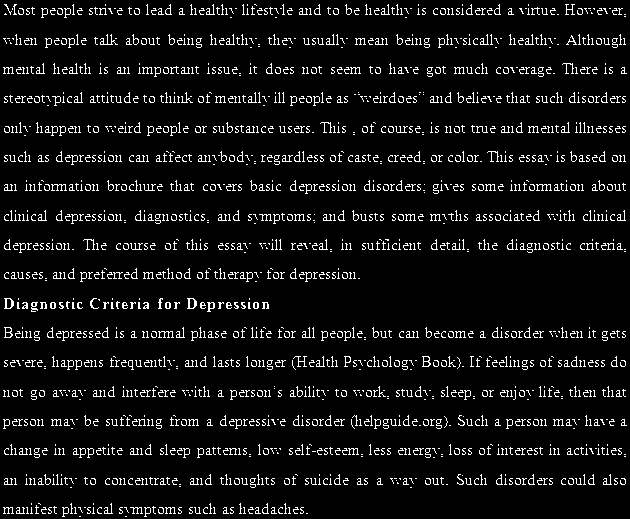

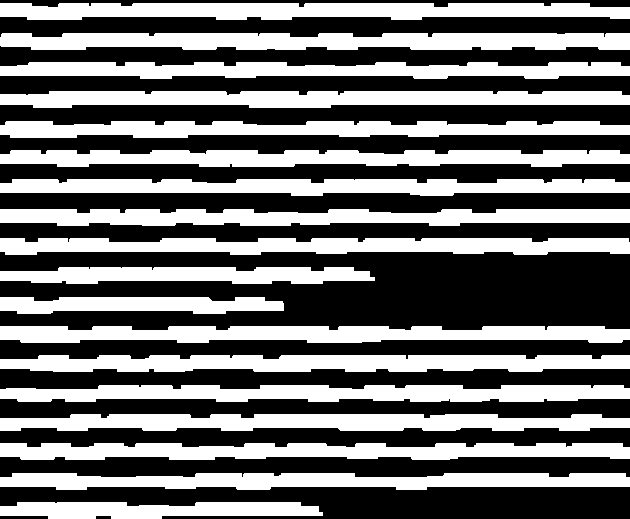

辨識結果 Most people strive to lead a healthy lifestyle and to be healthy is considered a virtue. However,
when people talk about being healthy, they usually mean being physically healthy. Although
mental health is an important issue, it does not seem to have got much coverage. There is a
stereotypical attitude to think of mentally ill people as “weirdoes” and believe that such disorders
only happen to weird people or substance users. This , of course, is not true and mental illnesses
such as depression can affect anybody, regardless of caste, creed, or color. This essay is based on
an information brochure that covers basic depression disorders; gives some information about
clinical depression, diagnostics, and symptoms; and busts some myths associated with clinical
depression. The course of this essay will reveal, in sufficient detail, the diagnostic caiteria,
causes, and preferred method of therapy for depression.

Diagnostic Criteria for Depression

Being depressed is a normal phase of 

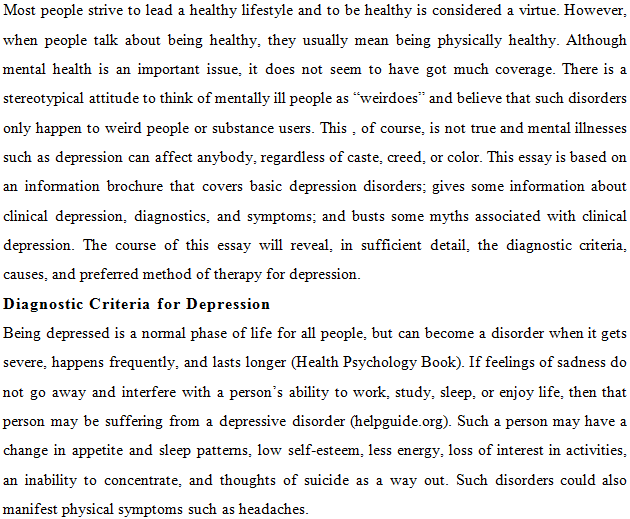

In [ ]:
import pytesseract as pt
import cv2  
import numpy as np  
import IPython.display as dp
from google.colab.patches import cv2_imshow
from pyzbar import pyzbar
pic_o = cv2.imread("/content/drive/MyDrive/OCR/psychology-orignal.png", 1)
pic = cv2.imread("/content/drive/MyDrive/OCR/psychology-orignal.png", 0)
# ocr_res = pt.image_to_string(pic, "/content/drive/MyDrive/OCR/Graffiti.ttf")
pic_bin = cv2.inRange(pic, 0, 100)
cv2_imshow(pic_bin)
pic_bin = cv2.dilate(pic_bin, np.ones((4, 30)))
cv2_imshow(pic_bin)
contours_p, he = cv2.findContours(pic_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
for i in range(-len(contours_p), -2, -1):
    rect_x, rect_y, width, height = cv2.boundingRect(contours_p[i])
    # 框出裁切範圍
    # cv2.rectangle(pic_o, (rect_x, rect_y), (rect_x + width, rect_y + height), (0, 0, 255), 1 )
    # 裁切
    cv2_imshow(pic_o[rect_y: rect_y + height, rect_x: rect_x + width, :])
text = pt.image_to_string(pic, "eng")
print("辨識結果", text)
cv2_imshow(pic_o)


In [ ]:
!python training.py

In [ ]:
import os

os.chdir(os.path.dirname(os.path.realpath("/content/drive/MyDrive/OCR/OCRtest")))

lang="my"
file="神奇.png"
os.system(f"cp {file} {lang}.src")
os.system(f"tesseract {lang}.src {lang} batch.nochop makebox")
input(f"請先確認{lang}.box檔案內容是否正確在按Enter鍵")
os.system(f"tesseract {lang}.src {lang} nobatch box.train")
os.system(f"unicharset_extractor {lang}.box")
os.system(f"echo {lang} 0 0 0 0 0 > font_properties")
os.system(f"shapeclustering -F font_properties -U unicharset {lang}.tr")
os.system(f"mftraining -F font_properties -U unicharset -O unicharset {lang}.tr")
os.system(f"cntraining {lang}.tr")
os.system(f"mv unicharset {lang}.unicharset")
os.system(f"mv normproto {lang}.normproto")
os.system(f"mv pffmtable {lang}.pffmtable")
os.system(f"mv shapetable {lang}.shapetable")
os.system(f"mv inttemp {lang}.inttemp")
os.system(f"unlink {lang}.src")
os.system(f"unlink {lang}.box")
os.system(f"unlink {lang}.tr")
os.system(f"unlink font_properties")
os.system(f"combine_tessdata {lang}.")
os.system(f"unlink {lang}.unicharset")
os.system(f"unlink {lang}.normproto")
os.system(f"unlink {lang}.pffmtable")
os.system(f"unlink {lang}.shapetable")
os.system(f"unlink {lang}.inttemp")
os.system(f"mv {lang}.traineddata /usr/share/tesseract-ocr/4.00/tessdata/{lang}.traineddata")

請先確認my.box檔案內容是否正確在按Enter鍵-F


0

In [ ]:
!apt install libzbar-dev
!pip install pyzbar
!apt install tesseract-ocr
!pip install pytesseract
!apt install libzbar-dev
!pip install pyzbar

In [ ]:
from pyzbar import pyzbar
import pytesseract as pt
import cv2  
import numpy as np  
import IPython.display as dp
from google.colab.patches import cv2_imshow



pic_o = cv2.imread("/content/drive/MyDrive/OCR/istockphoto-466484879-612x612.jpg", 0)
ret = pyzbar.decode(pic_o)
for d in ret:
    print("條碼類型:", d.type)
    print("資料:", d.data.decode("utf-8"))
    x,y,w,h = d.rect
    cv2.rectangle(pic_o, (x, y), (x + w, y + h), (0,0,255), 2)
    print("=============================================================")
cv2_imshow


<function google.colab.patches.cv2_imshow(a)>

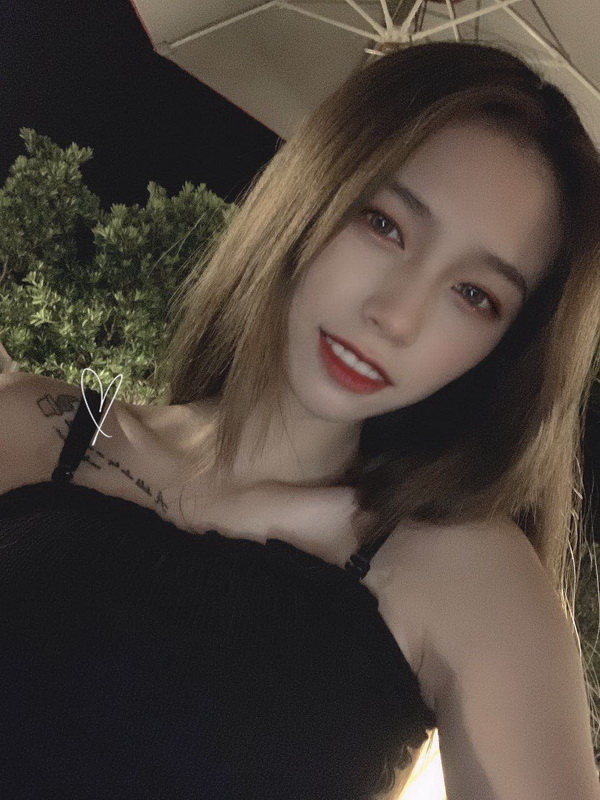

In [ ]:
from pyzbar import pyzbar
import pytesseract as pt
import cv2  
import numpy as np  
import IPython.display as dp

ml = cv2.imread("/content/155852wpgfutubehqttp4p.jpeg")

pl = cv2.CascadeClassifier("/content/drive/MyDrive/OCR/opcv_class/haarcascade_frontalface_default.xml")
ret = pl.detectMultiScale(ml, minNeighbors=20, minSize=(5, 5))
for x, y, w, h in ret:
    cv2.rectangle(ml, (x, y), (x + w, y + h), (0, 0, 255), 2)
cv2_imshow(ml)

In [ ]:
!pip uninstall opencv-python
!pip uninstall opencv-contrib-python
!pip install  opencv-python
!pip install  opencv-contrib-python


Found existing installation: opencv-python 3.4.18.65
Uninstalling opencv-python-3.4.18.65:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/cv2/*
    /usr/local/lib/python3.9/dist-packages/opencv_python-3.4.18.65.dist-info/*
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Core-39545cc7.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Gui-48e93776.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Test-c38a5234.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5Widgets-e69d94fb.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libQt5XcbQpa-c112ba75.so.5.15.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libX11-xcb-69166bdf.so.1.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libXau-00ec42fe.so.6.0.0
    /usr/local/lib/python3.9/dist-packages/opencv_python.libs/libavcodec-5896f664.so.58.134.100
    /usr/local/lib/python3.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 MB 13.1 MB/s eta 0:00:00


In [ ]:
!python /content/drive/MyDrive/OCR/classifier_training_colab/training.py

POS/00000.png
POS/00001.png
POS/00002.png
POS/00003.png
POS/00004.png
POS/00005.png
POS/00006.png
POS/00007.png
POS/00008.png
NEG/00000.png
NEG/00001.png
NEG/00002.png
NEG/00003.png
NEG/00004.png
NEG/00005.png
NEG/00006.png
NEG/00007.png
NEG/00008.png
NEG/00009.png
NEG/00010.png
NEG/00011.png
NEG/00012.png
NEG/00013.png
NEG/00014.png
NEG/00015.png
NEG/00016.png
NEG/00017.png
NEG/00018.png
NEG/00019.png
NEG/00020.png
NEG/00021.png
NEG/00022.png
NEG/00023.png
NEG/00024.png
===opencv_createsamples===
sh: 1: opencv_createsamples: not found
===opencv_traincascade===
sh: 1: opencv_traincascade: not found


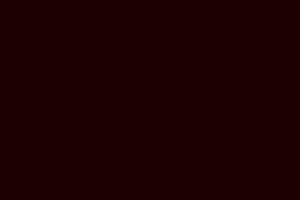

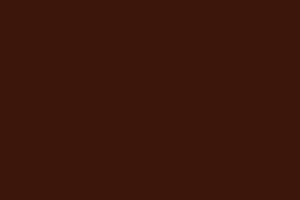

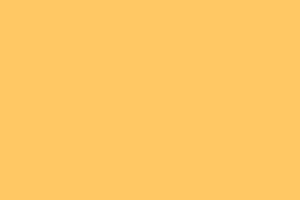

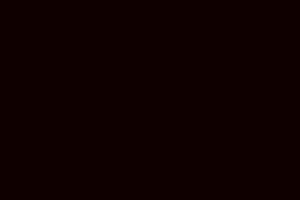

array([[[ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15],
        ...,
        [ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15]],

       [[ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15],
        ...,
        [ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15]],

       [[ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15],
        ...,
        [ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15]],

       ...,

       [[ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15],
        ...,
        [ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15]],

       [[ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15],
        ...,
        [ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15]],

       [[ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15],
        ...,
        [ 0,  0, 15],
        [ 0,  0, 15],
        [ 0,  0, 15]]], dtype=uint8)

In [ ]:
import pytesseract as pt
import cv2  
import numpy as np  
import IPython.display as dp
from google.colab.patches import cv2_imshow
pic = np.full((200, 300, 3), (1, 1, 30), np.uint8)
cv2_imshow(pic)
pic_add = cv2.add(pic, (10, 20, 30, 0))
cv2_imshow(pic_add)
pic_multi = cv2.multiply(pic, (100, 200, 2500, 0))
cv2_imshow(pic_multi)
pic_sub = cv2.subtract(pic, (100, 200, 15, 0))
cv2_imshow(pic_sub)
pic_sub